In [19]:
import os, sys, json
jsons = ["10032018_dev.json",
         "10082018_data.json",
         "10102018_data.json",
         "10112018_data.json",
         "11122018_train.json",
         "12182018_data.json"]
data = {}
for j in jsons:
    for key, value in json.load(open("../data/" + j)).items():
        data[key] = value

labels = json.load(open("../data/3class_object_split.json"))

In [32]:
import matplotlib.pyplot as plt
import numpy as np
def pair_to_names(x,y):
    return "({}, {})".format(labels['names'][x], labels['names'][y])

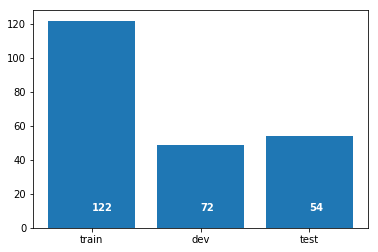

In [53]:
in_fold = ["train", "dev", "test"]
in_data = {"train": 0, "dev": 0, "test": 0}
for key in in_data:
    for x,y in zip(labels['folds'][key]['in']['ob1'], labels['folds'][key]['in']['ob2']):
        in_data[key] += 1 if pair_to_names(x,y) in data else 0

fig, ax = plt.subplots()
for v in in_fold:
    ax.text(v, 10, str(on_data[v]), color='white', fontweight='bold')        
_ = plt.bar(in_fold, [in_data[key] for key in in_fold])

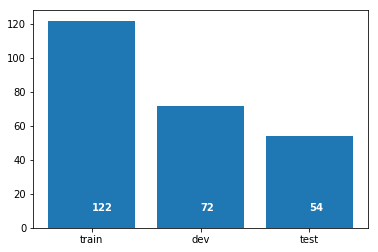

In [54]:
on_fold = ["train", "dev", "test"]
on_data = {"train": 0, "dev": 0, "test": 0}
for key in in_data:
    for x,y in zip(labels['folds'][key]['on']['ob1'], labels['folds'][key]['on']['ob2']):
        on_data[key] += 1 if pair_to_names(x,y) in data else 0
fig, ax = plt.subplots()
for v in on_fold:
    ax.text(v, 10, str(on_data[v]), color='white', fontweight='bold')        
_ = plt.bar(on_fold, [on_data[key] for key in on_fold])

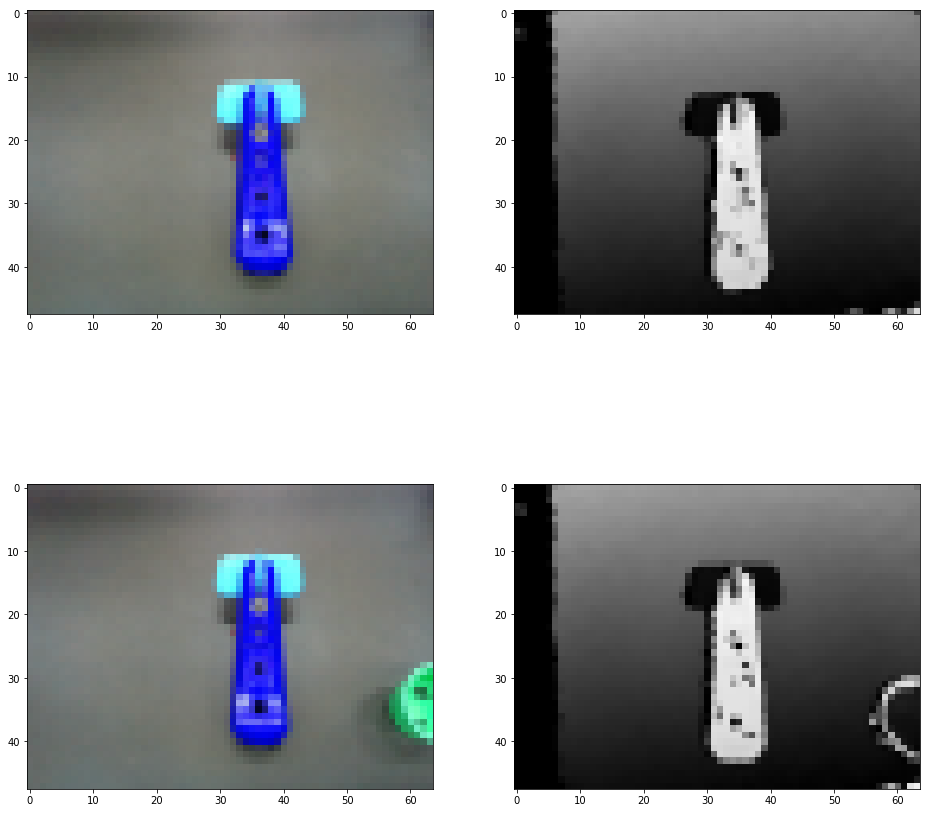

In [111]:
key = list(data.keys())[30]
trial = str(1)
fig = plt.figure(figsize=(16,16))
rc = 2
fig.add_subplot(rc,rc,1)
_ = plt.imshow(np.array(data[key][trial]['t0_rgbmap']).transpose([1,2,0])/255)
fig.add_subplot(rc,rc,2)
_ = plt.imshow(np.tile(np.array(data[key][trial]['t0_depthmap']).reshape((48, 64, 1)), (1,1,3))/255)
fig.add_subplot(rc,rc,3)
_ = plt.imshow(np.array(data[key][trial]['t1_rgbmap']).transpose([1,2,0])/255)
fig.add_subplot(rc,rc,4)
_ = plt.imshow(np.tile(np.array(data[key][trial]['t1_depthmap']).reshape((48, 64, 1)), (1,1,3))/255)